In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df=pd.read_csv('/content/drive/My Drive/HOTSTAR.csv')

In [0]:
df=df.fillna(0)

In [0]:
df1=pd.read_csv('/content/drive/My Drive/Hotstar_final.csv')

In [7]:
df1.head()

,Unnamed: 0,Train_ID,cities,segment,lund,mulund west,bhiwandi,nottingham,kathmandu,santa clara,sungai petani,herouville-saint-clair,navsari,kottayam,surbiton,paderborn,harbin,nagpur,camden,takapuna,pescara,jiddah,kunming,yiwu,barueri,altstadt-lehel,campulung,prabhadevi,dhaka,savona,luxembourg,friedrichshain,galle,dandenong,tirupati,nizhniy novgorod,kyiv,bhandup west,leicester,sao paulo,...,Fri,Sun,genres,Family,Travel,Romance,Athletics,Teen,Kids,Cricket,Crime,Drama,Table Tennis,LiveTV,Tennis,Football,Reality,Documentary,Kabaddi,Formula1,Swimming,Awards,Boxing,Science,Thriller,Volleyball,IndiaVsSa,FormulaE,Sport,Horror,Hockey,TalkShow,Wildlife,Badminton,Comedy,Mythology,Action,Genres_Times,Day_Times,Avg_Time
0,0,train-121672,"delhi:3492,mumbai:64",neg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,"Drama:6,Cricket:3469,Wildlife:79",0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3554,3554,3554
1,1,train-121673,"ahmedabad:56666,mumbai:26989",neg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,"Drama:48949,Family:9927,Crime:1901,Romance:165...",1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,83637,83639,83643
2,2,train-121670,navi mumbai:29400,neg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,"Cricket:5715,Family:2777,Drama:20873,LiveTV:4,...",1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,29398,29396,29398
3,3,train-121671,"chennai:77,navi mumbai:4005,mumbai:0",neg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,"Romance:77,Drama:122,Cricket:3883",0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4082,4082,4082
4,4,train-121676,"bangalore:5135,krishnarajapura:529,hosur:2864",pos,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,TalkShow:8529,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,8529,8528,8528


In [0]:
## Selecting top 20 cities from results of EDA df and its time
city=df[['Train_ID','segment','navi mumbai','delhi','mumbai','bangalore','gurgaon','chennai','kolkata','new delhi',
         'pune','bengaluru','hyderabad','chandigarh','prabhadevi','karachi','secunderabad','gandhinagar',
         'time_navi mumbai','time_delhi','time_mumbai','time_bangalore','time_gurgaon','time_chennai',
         'time_kolkata','time_new delhi',
         'time_pune','time_bengaluru','time_hyderabad','time_chandigarh',
         'time_prabhadevi','time_karachi','time_secunderabad','time_gandhinagar',]]

In [0]:
# selectng top genres from the results of EDA
genre=df[['Train_ID','segment','Cricket','Drama','Romance','Reality','TalkShow','Comedy','Family','Action','LiveTV',
          'Thriller','Crime','Mythology','Awards','Football','Horror','Badminton','Sport','Kids',
          'Travel','Wildlife','Teen','Science','Hockey','Kabaddi',
          'time_Cricket','time_Drama','time_Romance','time_Reality','time_TalkShow',
          'time_Comedy','time_Family','time_Action','time_LiveTV',
          'time_Thriller','time_Crime','time_Mythology','time_Awards',
          'time_Football','time_Horror','time_Badminton','time_Sport','time_Kids',
          'time_Travel','time_Wildlife','time_Teen','time_Science','time_Hockey','time_Kabaddi'
          ]]

In [0]:
dow=df[['Train_ID','segment','Sun','Mon','Tue','Wed','Thu','Fri','Sat',
        'time_Sun','time_Mon','time_Tue','time_Wed','time_Thu','time_Fri','time_Sat']]

In [0]:
time=df[['Train_ID','segment','0','1','2','3','4','5','6','7','8','9','10',
      '11','12','13','14','15','16','17','18','19','20','21','22','23'
      ,'time_0','time_1','time_2','time_3','time_4','time_5','time_6','time_7',
      'time_8','time_9','time_10',
      'time_11','time_12','time_13','time_14','time_15','time_16','time_17','time_18',
      'time_19','time_20','time_21','time_22','time_23']]

In [0]:
df_hotstar=pd.merge(city,genre,on=['Train_ID','segment'])
df_hotstar=pd.merge(df_hotstar,dow,on=['Train_ID','segment'])
df_hotstar=pd.merge(df_hotstar,time,on=['Train_ID','segment'])

In [0]:
t=df1[['Avg_Time','Train_ID','segment']]

In [0]:
df_hotstar=pd.merge(df_hotstar,t,on=['Train_ID','segment'])

In [15]:
df_hotstar.head()

,Train_ID,segment,navi mumbai,delhi,mumbai,bangalore,gurgaon,chennai,kolkata,new delhi,pune,bengaluru,hyderabad,chandigarh,prabhadevi,karachi,secunderabad,gandhinagar,time_navi mumbai,time_delhi,time_mumbai,time_bangalore,time_gurgaon,time_chennai,time_kolkata,time_new delhi,time_pune,time_bengaluru,time_hyderabad,time_chandigarh,time_prabhadevi,time_karachi,time_secunderabad,time_gandhinagar,Cricket,Drama,Romance,Reality,TalkShow,Comedy,...,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,time_0,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9,time_10,time_11,time_12,time_13,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21,time_22,time_23,Avg_Time
0,train-121672,neg,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3492.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,320.0,1372.0,0.0,0.0,1862.0,0.0,0.0,3554
1,train-121673,neg,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26989.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7944.0,7419.0,9807.0,0.0,0.0,0.0,0.0,0.0,0.0,2005.0,3521.0,7726.0,3844.0,2067.0,2807.0,967.0,4438.0,5734.0,4274.0,3822.0,4608.0,9360.0,304.0,2988.0,83643
2,train-121670,neg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1874.0,504.0,201.0,4388.0,1594.0,302.0,133.0,331.0,3083.0,1640.0,0.0,0.0,101.0,3683.0,3802.0,3430.0,2219.0,2111.0,29398
3,train-121671,neg,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4005.0,0.0,0.0,0.0,0.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.0,0.0,77.0,0.0,0.0,1800.0,2083.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4082
4,train-121676,pos,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5135.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1268.0,529.0,1257.0,4930.0,538.0,8528


In [0]:
for i in range(0,len(df_hotstar.columns)):
  if(df_hotstar.iloc[:,i].dtype=='float'):
    df_hotstar.iloc[:,i]=df_hotstar.iloc[:,i].astype('int')

In [17]:
df_hotstar.head()

,Train_ID,segment,navi mumbai,delhi,mumbai,bangalore,gurgaon,chennai,kolkata,new delhi,pune,bengaluru,hyderabad,chandigarh,prabhadevi,karachi,secunderabad,gandhinagar,time_navi mumbai,time_delhi,time_mumbai,time_bangalore,time_gurgaon,time_chennai,time_kolkata,time_new delhi,time_pune,time_bengaluru,time_hyderabad,time_chandigarh,time_prabhadevi,time_karachi,time_secunderabad,time_gandhinagar,Cricket,Drama,Romance,Reality,TalkShow,Comedy,...,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,time_0,time_1,time_2,time_3,time_4,time_5,time_6,time_7,time_8,time_9,time_10,time_11,time_12,time_13,time_14,time_15,time_16,time_17,time_18,time_19,time_20,time_21,time_22,time_23,Avg_Time
0,train-121672,neg,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3492,64,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,320,1372,0,0,1862,0,0,3554
1,train-121673,neg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26989,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,...,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,7944,7419,9807,0,0,0,0,0,0,2005,3521,7726,3844,2067,2807,967,4438,5734,4274,3822,4608,9360,304,2988,83643
2,train-121670,neg,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,...,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,1874,504,201,4388,1594,302,133,331,3083,1640,0,0,101,3683,3802,3430,2219,2111,29398
3,train-121671,neg,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,4005,0,0,0,0,77,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,...,0,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,122,0,77,0,0,1800,2083,0,0,0,0,0,0,0,4082
4,train-121676,pos,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,1268,529,1257,4930,538,8528


# Segregating customer lwith similar behaviour pattern

## Applying PCA

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [19]:
sc=StandardScaler()
X=df_hotstar.drop(['Train_ID','segment'],axis=1)
x=sc.fit_transform(X)
pca=PCA(0.95)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
pca.explained_variance_

array([22.96382322,  5.99093492,  4.22282097,  2.96356703,  2.44498482,
        2.12577203,  2.07781812,  1.96374022,  1.85980564,  1.73710471,
        1.68457082,  1.56087148,  1.55065044,  1.51182239,  1.44694496,
        1.42916605,  1.41487505,  1.39423486,  1.38000605,  1.34731263,
        1.3227907 ,  1.30110244,  1.28346814,  1.27196427,  1.26219375,
        1.25071021,  1.23485215,  1.22945063,  1.21904181,  1.1996469 ,
        1.19924064,  1.18559974,  1.17379936,  1.15088252,  1.14028733,
        1.11850205,  1.11248057,  1.09770199,  1.091419  ,  1.0622413 ,
        1.05160304,  1.03998117,  0.99911263,  0.96192505,  0.95911303,
        0.93275561,  0.91156178,  0.88151911,  0.86126238,  0.85952063,
        0.83356895,  0.82425762,  0.82361264,  0.81002135,  0.80821935,
        0.79812718,  0.78620908,  0.78033842,  0.76982533,  0.7614365 ,
        0.75266685,  0.75006119,  0.74442242,  0.73083134,  0.72562795,
        0.7187212 ,  0.71396067,  0.71278855,  0.70504218,  0.69

In [21]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,0.008433,-0.064754,navi mumbai
1,0.022443,-0.068241,delhi
2,0.036056,-0.071095,mumbai
3,0.027970,-0.049732,bangalore
4,0.013255,-0.041638,gurgaon
...,...,...,...
138,0.139249,0.015105,time_20
139,0.137569,0.013189,time_21
140,0.132947,0.037839,time_22
141,0.130624,0.072142,time_23


In [22]:
pca.n_components_

112

In [0]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=112)

In [23]:
pca_final.fit(x)

IncrementalPCA(batch_size=None, copy=True, n_components=112, whiten=False)

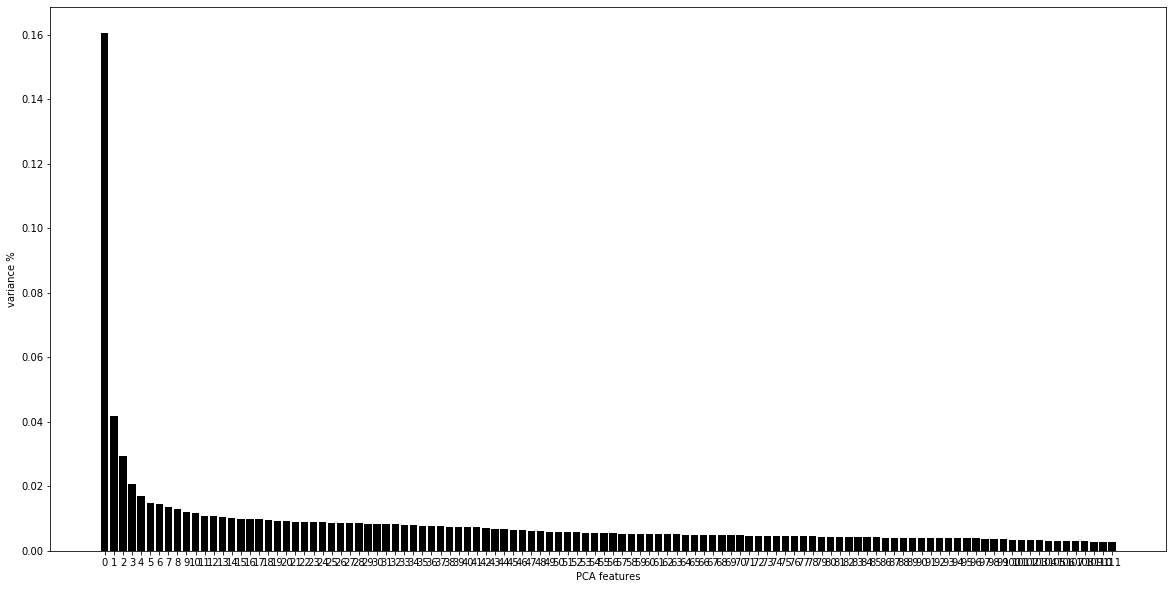

In [24]:
# Plot the explained variances
features = range(pca_final.n_components_)
plt.figure(figsize=(20,10))
plt.bar(features, pca_final.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

In [0]:
principalComponents = pca_final.fit_transform(x)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

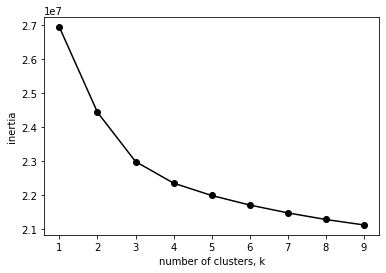

In [58]:
from sklearn.cluster import KMeans
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:111])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

#### After cluster 4 the change in the value of inertia is no longer significant and most likely, neither is the variance of the rest of the data after the elbow point.

In [27]:
from sklearn.cluster import KMeans
# Create a KMeans instance with k clusters: model
model = KMeans(n_clusters=4)
    
# Fit model to samples
model.fit(PCA_components.iloc[:,:111])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
clustid=model.labels_

In [0]:
df_hotstar['Clust_ID']=clustid

In [30]:
df_hotstar['Clust_ID'].value_counts()

0    106513
2     77040
3     15042
1      1405
Name: Clust_ID, dtype: int64

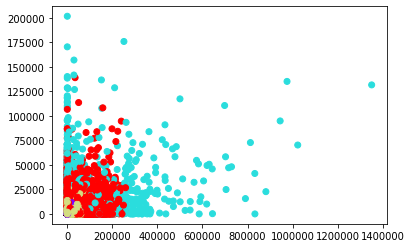

In [31]:
# Mumbai time vs Night Time
plt.scatter(df_hotstar['time_mumbai'],df['time_0'],c=df_hotstar['Clust_ID'], cmap="rainbow")

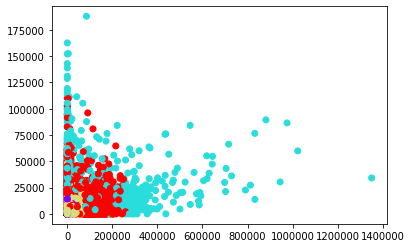

In [32]:
# Mumbai time vs Night Time
plt.scatter(df_hotstar['time_mumbai'],df['time_22'],c=df_hotstar['Clust_ID'], cmap="rainbow")

In [0]:
pos=df_hotstar[df_hotstar['segment']=='pos']

In [0]:
neg=df_hotstar[df_hotstar['segment']=='neg']

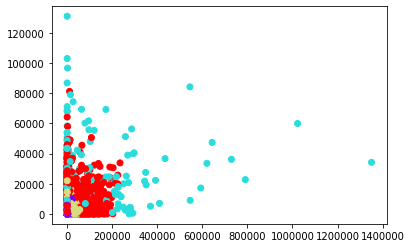

In [35]:
# Mumbai time vs Night Time
plt.scatter(pos['time_mumbai'],pos['time_22'],c=pos['Clust_ID'], cmap="rainbow")

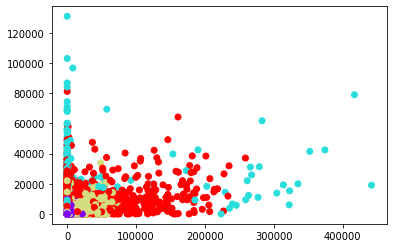

In [36]:
# Navi Mumbai time vs Night Time
plt.scatter(pos['time_navi mumbai'],pos['time_22'],c=pos['Clust_ID'], cmap="rainbow")

No handles with labels found to put in legend.


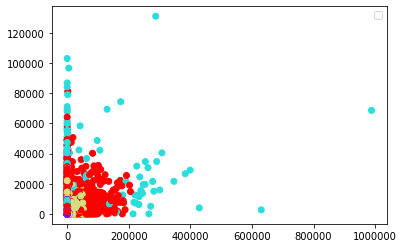

In [37]:
# Navi Mumbai time vs Night Time
plt.scatter(pos['time_bangalore'],pos['time_22'],c=pos['Clust_ID'], cmap="rainbow")
plt.legend()

In [38]:
pos['Clust_ID'].value_counts()

0    7251
2    5556
3    2166
1     282
Name: Clust_ID, dtype: int64

In [39]:
neg['Clust_ID'].value_counts()

0    99262
2    71484
3    12876
1     1123
Name: Clust_ID, dtype: int64

In [0]:
### Creating Models for different clusters
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [0]:
X_sc,y=sc.fit_transform(X),df_hotstar['segment']
# Building the model 
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, 
										criterion ='entropy', max_features = 2) 

# Training the model 
extra_tree_forest.fit(X_sc, y) 

# Computing the importance of each feature 
feature_importance = extra_tree_forest.feature_importances_ 

# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in
										extra_tree_forest.estimators_], 
										axis = 0) 


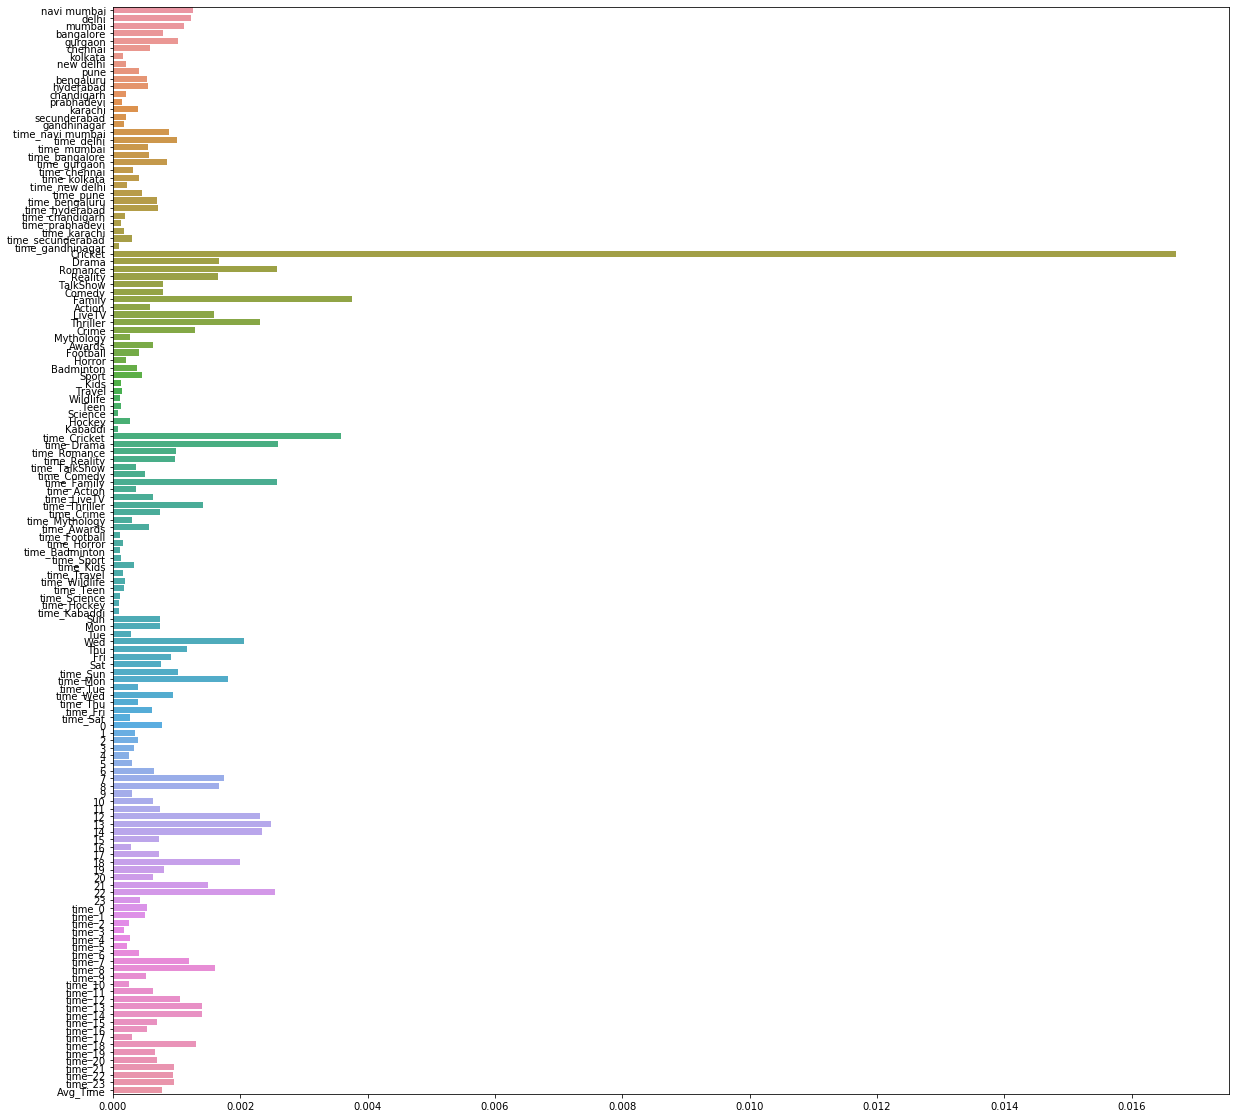

In [42]:
# Plotting a Bar Graph to compare the models 
plt.figure(figsize=(20,20))
sns.barplot(feature_importance_normalized,X.columns,orient='h')

In [99]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KeyboardInterrupt: ignored

In [0]:
def Model_Performance(xtrain,xtest,ytrain,ytest,model):
  model.fit(xtrain,ytrain)
  print('Train Accuracy:',model.score(xtrain,ytrain)) 
  print('Test Accuracy:',model.score(xtest,ytest))
  print('------ Confusion Matrix --------')
  pred=model.predict(xtest)
  print(confusion_matrix(pred,ytest))
  print('-------- Classification Report --------')
  print(classification_report(ytest,pred))

In [44]:
from imblearn.over_sampling import SMOTE
clust_0=df_hotstar[df_hotstar['Clust_ID']==0]
X_0=df_hotstar[df_hotstar['Clust_ID']==0].drop(['Train_ID','Clust_ID','segment'],axis=1)
y_0=df_hotstar[df_hotstar['Clust_ID']==0]['segment']

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [45]:
y_0.value_counts()

neg    99262
pos     7251
Name: segment, dtype: int64

In [0]:
xtrain,xtest,ytrain,ytest=train_test_split(X_0,y_0,test_size=0.3,random_state=0)

In [0]:
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [48]:
# LogisticRegression
lr=LogisticRegression()
smt=SMOTE()
xtrain,ytrain=smt.fit_sample(xtrain,ytrain)
xtest,ytest=smt.fit_sample(xtest,ytest)
Model_Performance(xtrain,xtest,ytrain,ytest,lr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train Accuracy: 0.7249270067743466
Test Accuracy: 0.7181604170169833
------ Confusion Matrix --------
[[19075  6101]
 [10660 23634]]
-------- Classification Report --------
              precision    recall  f1-score   support

         neg       0.76      0.64      0.69     29735
         pos       0.69      0.79      0.74     29735

    accuracy                           0.72     59470
   macro avg       0.72      0.72      0.72     59470
weighted avg       0.72      0.72      0.72     59470



In [0]:
# KNN
model=KNeighborsClassifier(n_neighbors=5)
Model_Performance(xtrain,xtest,ytrain,ytest,model)

In [49]:
# DecisionTree
model=DecisionTreeClassifier(max_depth=10)
Model_Performance(xtrain,xtest,ytrain,ytest,model)

Train Accuracy: 0.8263120801990593
Test Accuracy: 0.817067428955776
------ Confusion Matrix --------
[[22628  3772]
 [ 7107 25963]]
-------- Classification Report --------
              precision    recall  f1-score   support

         neg       0.86      0.76      0.81     29735
         pos       0.79      0.87      0.83     29735

    accuracy                           0.82     59470
   macro avg       0.82      0.82      0.82     59470
weighted avg       0.82      0.82      0.82     59470



In [53]:
# AdaboostClassifier
model=AdaBoostClassifier(n_estimators=100)
Model_Performance(xtrain,xtest,ytrain,ytest,model)

Train Accuracy: 0.9370172738648295
Test Accuracy: 0.943921304859593
------ Confusion Matrix --------
[[29500  3100]
 [  235 26635]]
-------- Classification Report --------
              precision    recall  f1-score   support

         neg       0.90      0.99      0.95     29735
         pos       0.99      0.90      0.94     29735

    accuracy                           0.94     59470
   macro avg       0.95      0.94      0.94     59470
weighted avg       0.95      0.94      0.94     59470



In [0]:
# GradientBoostingClassifier
model=GradientBoostingClassifier(n_estimators=100,max_depth=10)
Model_Performance(xtrain,xtest,ytrain,ytest,model)